# SeaBorn

### https://github.com/robotautas/kursas/blob/master/Seaborn/Seaborn.ipynb


In [2]:
import seaborn as sns
import pandas as pd
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [42]:
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [3]:
tips['day'].unique()

['Sun', 'Sat', 'Thur', 'Fri']
Categories (4, object): ['Thur', 'Fri', 'Sat', 'Sun']

In [4]:
tips['time'].unique()

['Dinner', 'Lunch']
Categories (2, object): ['Lunch', 'Dinner']

In [5]:
tips.shape

(244, 7)

* Pasiskirstymo histogramos
* Jų pagalba matysime, koks yra kokio nors vieno rodiklio pasiskirstymas.

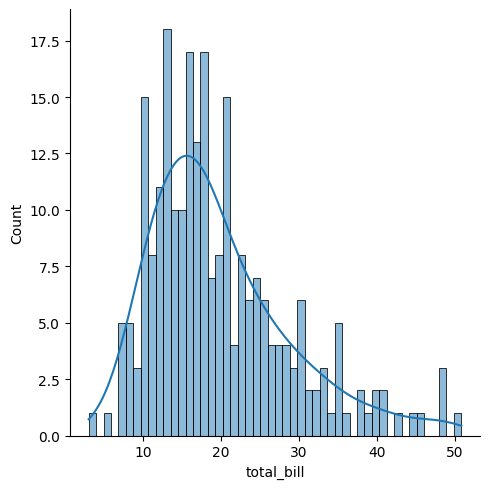

In [14]:
sns.displot(tips['total_bill'], kde=True, bins=50)

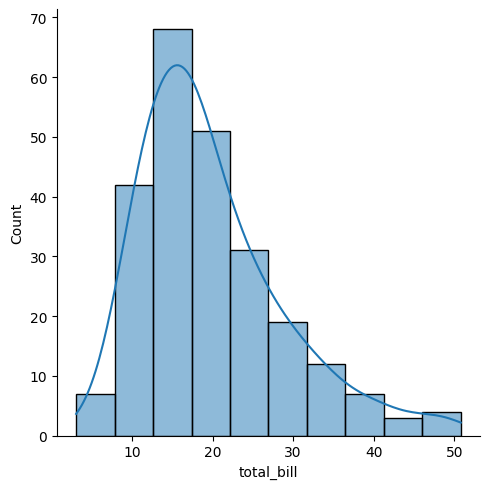

In [16]:
sns.displot(tips['total_bill'], kde=True, bins=10)

* parametras kde gali nuimti lijiną, o parametras bins padidinti stulpelių skaičių.

<AxesSubplot: xlabel='total_bill', ylabel='tip'>

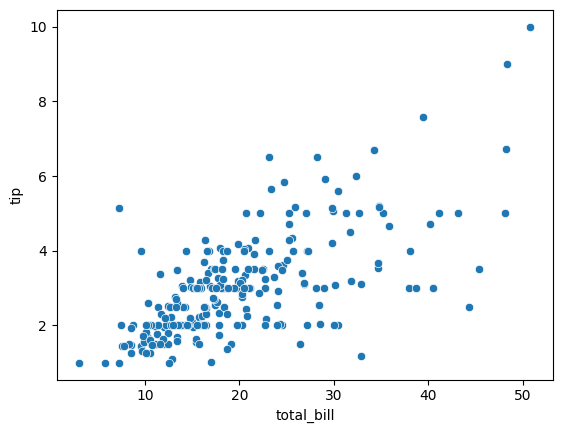

In [20]:
sns.scatterplot(data=tips, x='total_bill', y='tip')

### .jointplot()

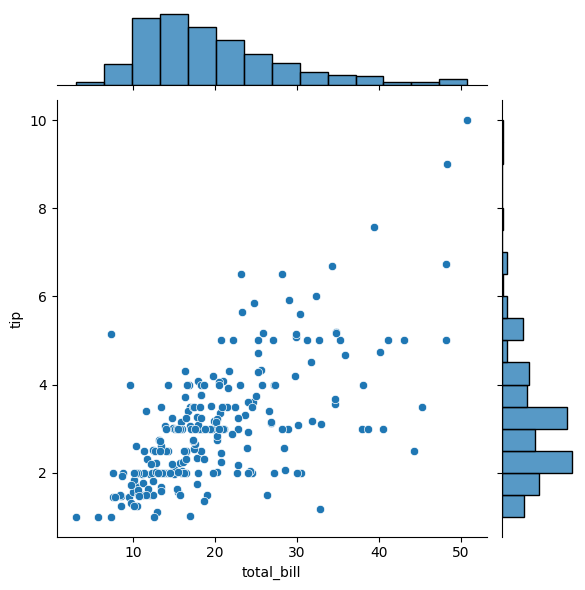

In [21]:
sns.jointplot(x='total_bill', y='tip', data=tips)

* Matome, koks yra sąntykio tarp 'total_bill' ir 'tip' pasiskirstymas. Pagrindiniame lange yra sklaidos diagrama, o iš dešinės ir viršuje - tos pačios histogramos, iš kurių sukombinavome rezultatą.

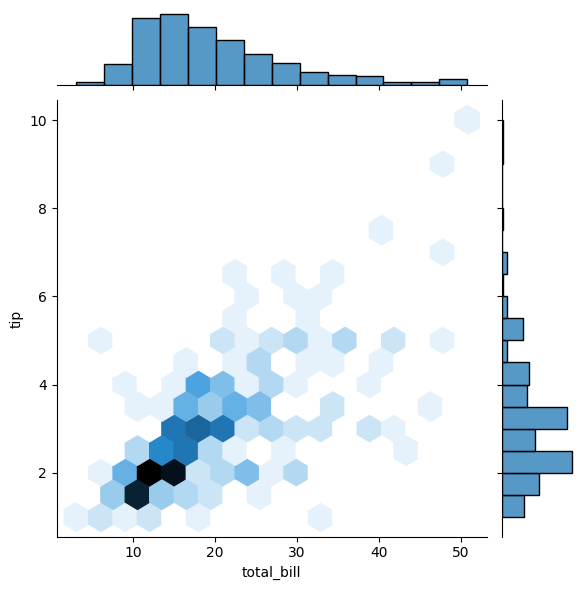

In [23]:
sns.jointplot(x='total_bill', y='tip', data=tips, kind='hex')

* reikšmė 'reg' stengiasi nubrėžti mums liniją, kuri atspindėtų tendenciją.

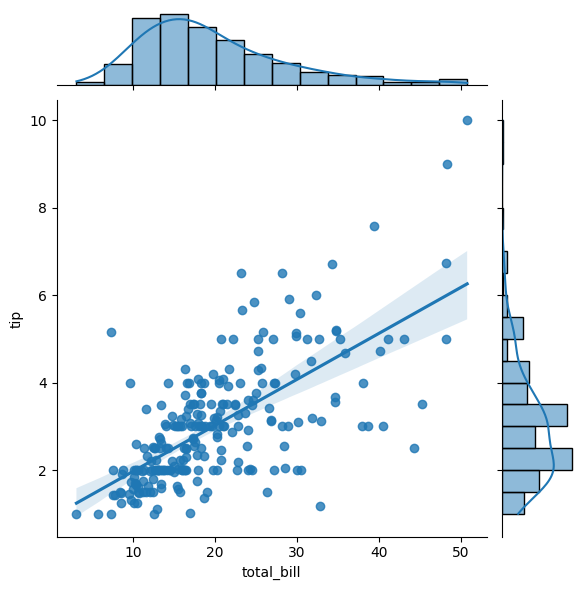

In [24]:
sns.jointplot(x='total_bill', y='tip', data=tips, kind='reg')


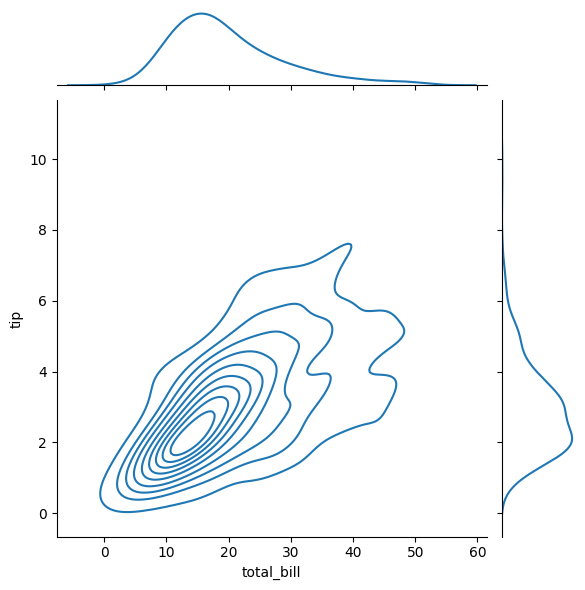

In [27]:
sns.jointplot(x='total_bill', y='tip', data=tips, kind='kde')


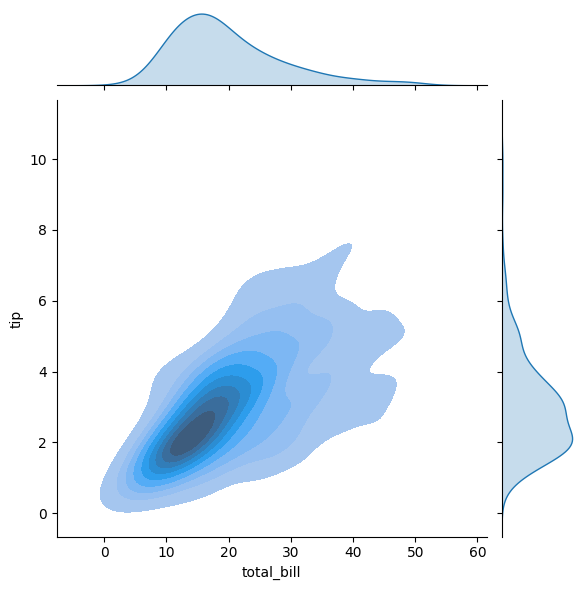

In [26]:
sns.jointplot(x='total_bill', y='tip', data=tips, kind='kde', fill=True)


### .scatterplot()
* Parametruose taip pat galima nurodyti hue ir size reikšmes:



<AxesSubplot: xlabel='total_bill', ylabel='tip'>

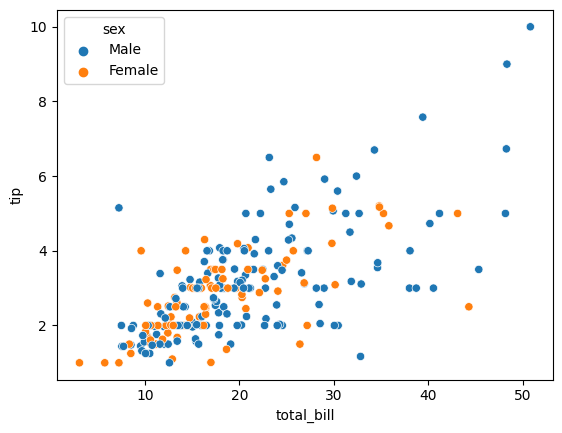

In [28]:
sns.scatterplot(data=tips, x='total_bill', y='tip', hue = 'sex')

<AxesSubplot: xlabel='total_bill', ylabel='tip'>

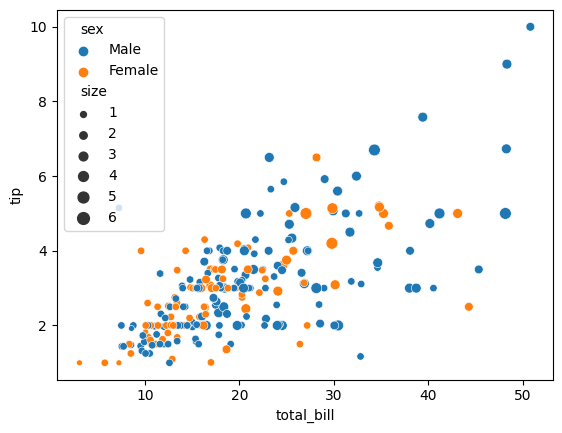

In [29]:
sns.scatterplot(data=tips, x='total_bill', y='tip', hue = 'sex', size='size')

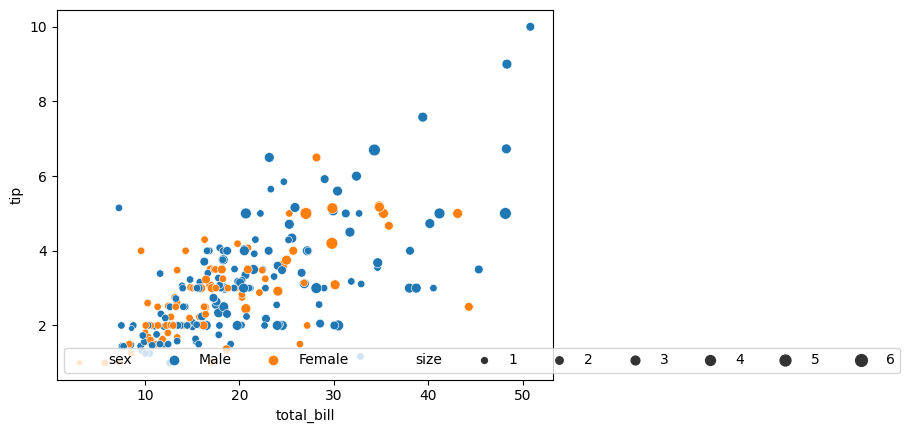

In [36]:
plot=sns.scatterplot(data=tips, x='total_bill', y='tip', hue = 'sex', size='size')
plot.legend(ncol=10, loc="lower left")

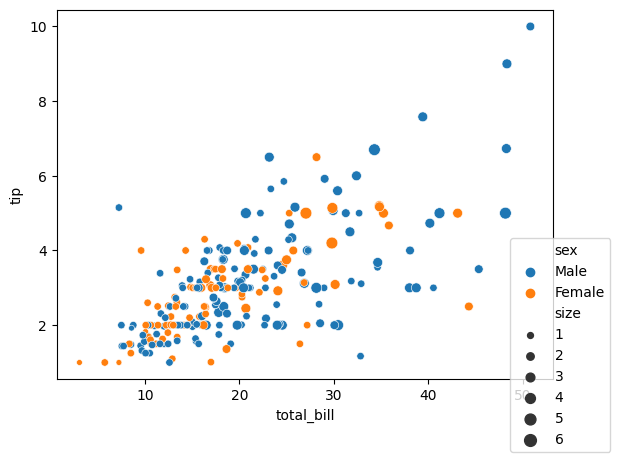

In [37]:
plot=sns.scatterplot(data=tips, x='total_bill', y='tip', hue = 'sex', size='size')
sns.move_legend(plot, "upper left", bbox_to_anchor=(0.9, 0.4))


### .pairplot()

* duoda mums visas įmanomas pasiskirstymo kombinacijas lentelėje:

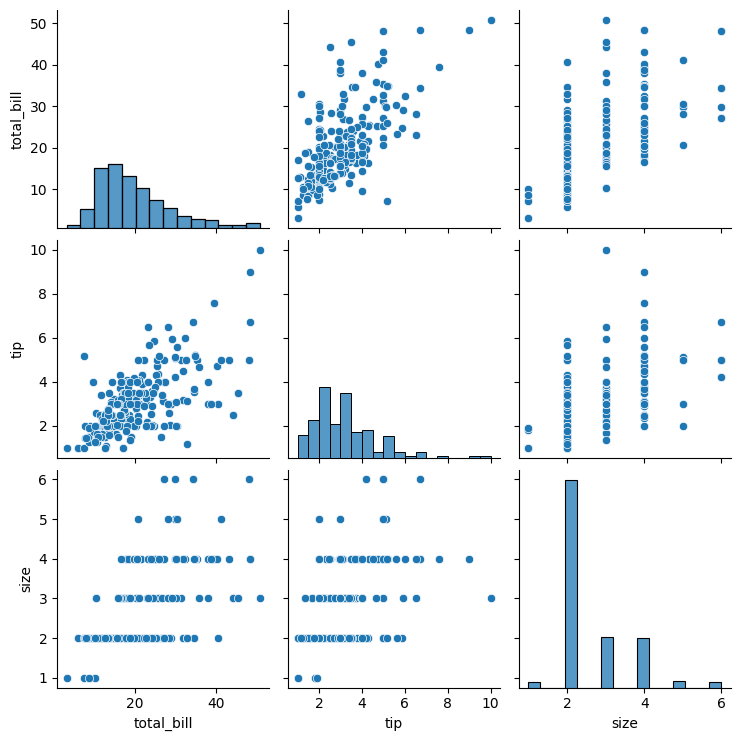

In [38]:
sns.pairplot(tips)

<AxesSubplot: xlabel='total_bill', ylabel='size'>

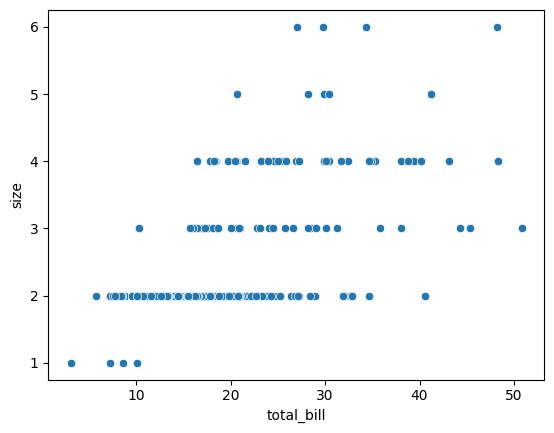

In [39]:
sns.scatterplot(x='total_bill', y='size', data=tips)


* parametras hue išskiria kategorines reikšmes, o diag_kind šiuo atveju nurodo, kad įstrižainėje norime matyti ne linijas, o histogramas pvz.:

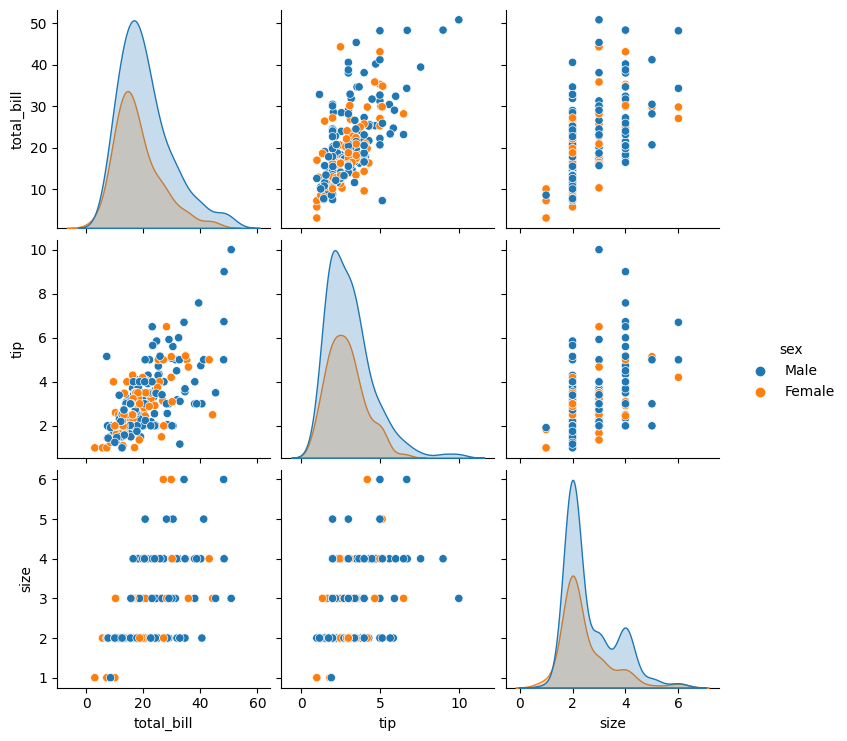

In [41]:
sns.pairplot(tips, hue='sex')


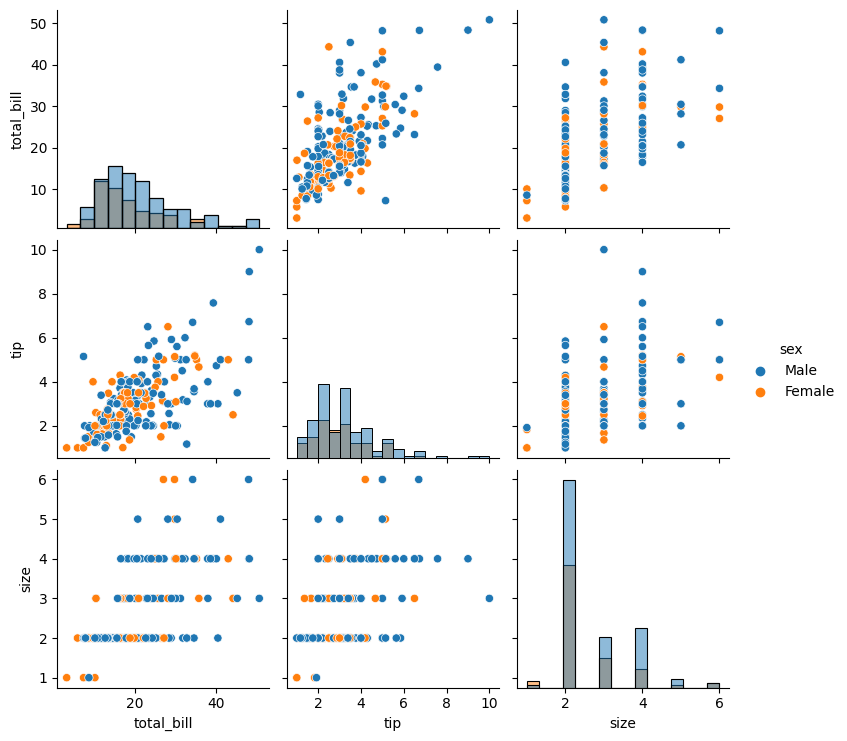

In [40]:
sns.pairplot(tips, hue='sex', diag_kind='hist')


## Kategorizavimo histogramos


* .barplot() išskirsto kategorijas pagal kurį nors rodiklį ir leidžia tam rodikliui taikyi kokią nors funkciją:

<AxesSubplot: xlabel='sex', ylabel='total_bill'>

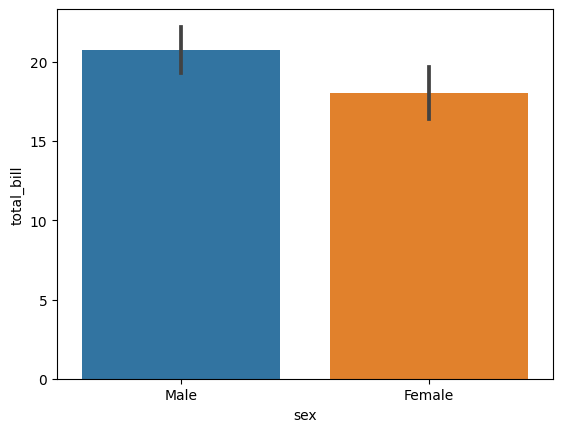

In [44]:
sns.barplot(data=tips, x='sex', y='total_bill')

* Jeigu mes nenurodome, kokia ta funkcija, numatyta reikšmė yra vidurkis. Taigi šiame pavyzdyje matome sąskaitos vidurkių pasiskirstymą tarp lyčių. Jeigu norime nurodyti vidurkį, turime naudoti estimator parametrą, pvz.:

<AxesSubplot: xlabel='sex', ylabel='total_bill'>

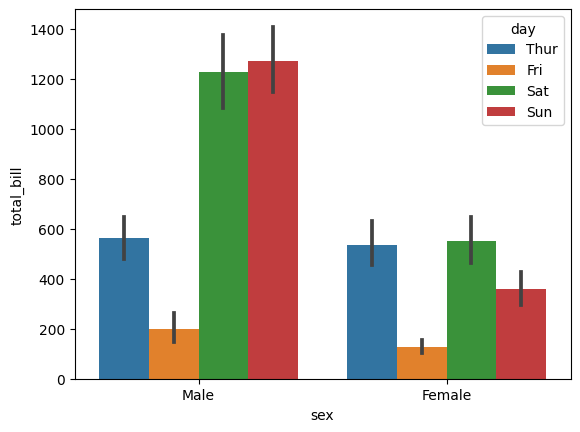

In [46]:
sns.barplot(x='sex', y='total_bill', data=tips, hue='day', estimator='sum')
# Šiuo atveju matome bendras sumas. Taip pat panaudojome hue, tokiu būdu rezultatą išskirstydami savaitės dienomis. Nekreipkite dėmesio į juodas linijas, jos yra error bars, rodo statistinį skaičiavimo patikimumą, ir nėra mums aktualios. Norint jas išjungti, parametruose nurodykite ci=False

### .countplot() tiesiog suskaičiuoja kategorijas:

<AxesSubplot: xlabel='smoker', ylabel='count'>

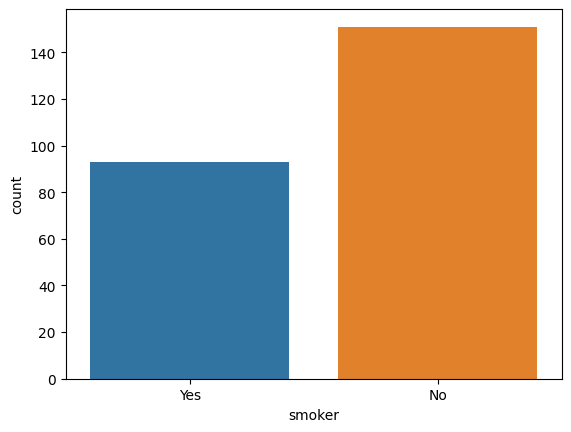

In [49]:
sns.countplot(tips, x='smoker')


### .boxplot() - stačiakampės diagramos


<AxesSubplot: xlabel='smoker', ylabel='total_bill'>

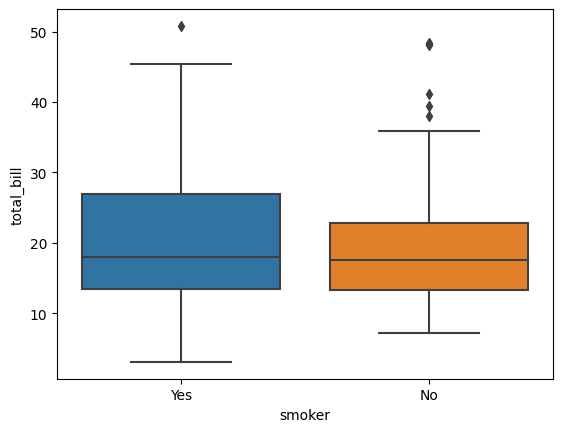

In [50]:
sns.boxplot(tips, x='smoker', y='total_bill')
# taskai - tai yra isimtis 1/4 dalis
# Kas yra boxplot (stačiakampė diagrama)? Iš esmės tai į ketvirtadalius sugrupuota informacija. Mūsų pavyzdyje matosi, kad rūkalių viršutinis ketvirtadalis maistui išleido nuo ~28 iki ~46, kai tuo tarpu nerūkančiųjų viršutinis ketvirtadalis išleido nuo ~24 iki ~37. Taškai viršuje yra išimtys. Jie pasitaiko per retai, kad būtų įtraukti į ketvirtadalius.

### .heatmap()   Koreliacija
* pandas turi metodą, kuris parodo skaičių koreliacijas lentelėje:

In [52]:
koreliacijos = tips.corr()
koreliacijos


C:\Users\serge\AppData\Local\Temp\ipykernel_19652\4015331821.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  koreliacijos = tips.corr()


,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


* čia turime koreliacijų matricą. Ji rodo, kaip skirtingi kintamieji tarpusavyje koreliuoja. Kad būtų lengviau skaityti, atsispausdinkime vizualizaciją (mozaikinę diagramą):

<AxesSubplot: >

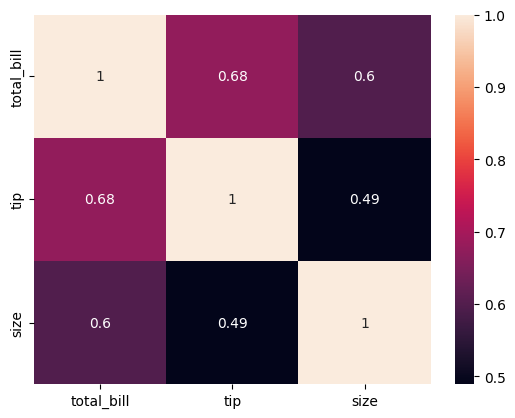

In [53]:
sns.heatmap(koreliacijos, annot=True)


### .FacetGrid()
* .FacetGrid() leidžia susikurti tinklelį, kurį vėliau reikės užpildytyi diagramomis. Pvz.:

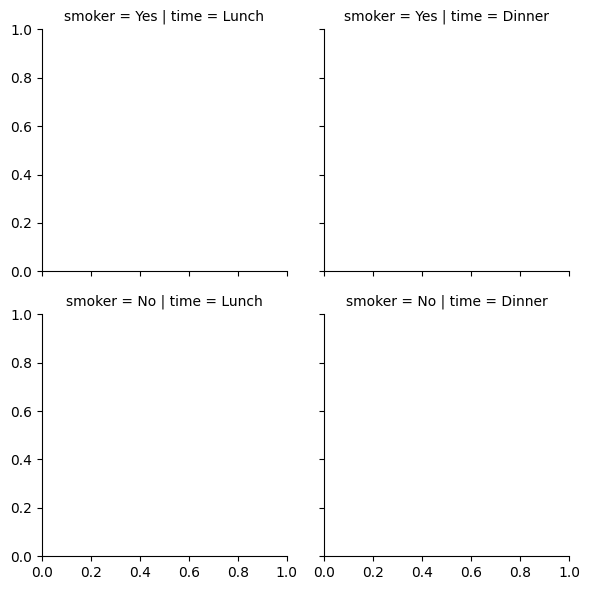

In [55]:
grid = sns.FacetGrid(data=tips, col='time', row ='smoker')
grid

### .FacetGrid()
* .FacetGrid() leidžia susikurti tinklelį, kurį vėliau reikės užpildytyi diagramomis. Pvz.:

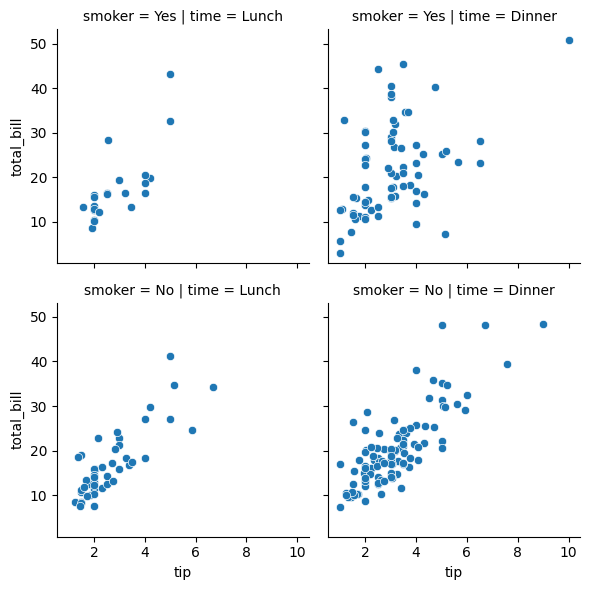

In [60]:
grid = sns.FacetGrid(tips, col='time', row ='smoker')
grid.map(sns.scatterplot, 'tip','total_bill')
grid

### Stilius ir spalvos
### .set_style()

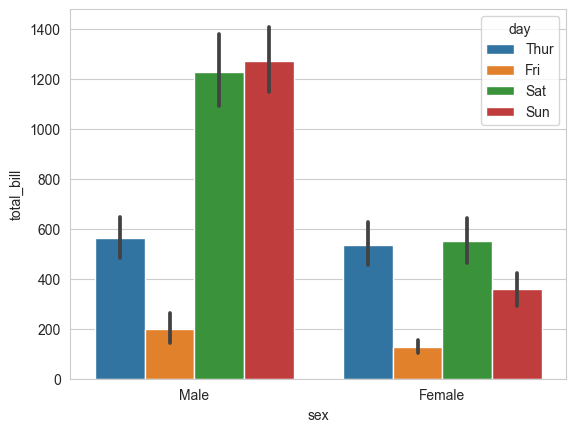

In [69]:
sns.barplot(x='sex', y='total_bill', data=tips, hue='day', estimator='sum')
sns.set_style('whitegrid')

<AxesSubplot: xlabel='sex', ylabel='total_bill'>

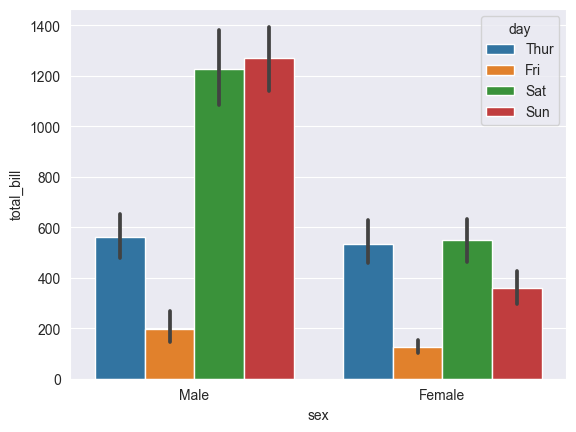

In [70]:
sns.set_style('darkgrid')
sns.barplot(x='sex', y='total_bill', data=tips, hue='day', estimator='sum')


### .despine()
* Nuima viršutinį ir dešinį rėmą.



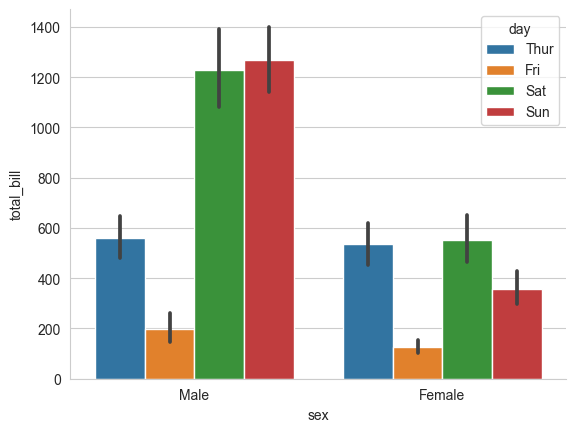

In [79]:
sns.set_style('whitegrid')
sns.barplot(x='sex', y='total_bill', data=tips, hue='day', estimator=sum)
sns.despine()

### palette parametras
* leidžia pasirinkti vieną iš paruoštų naudoti spalvų palečių. Jas rasite čia. Kai kurie metodai nepriima parametro palette, tuomet reikia bandyti tas pačias reikšmes nurodyti į cmap parametrą

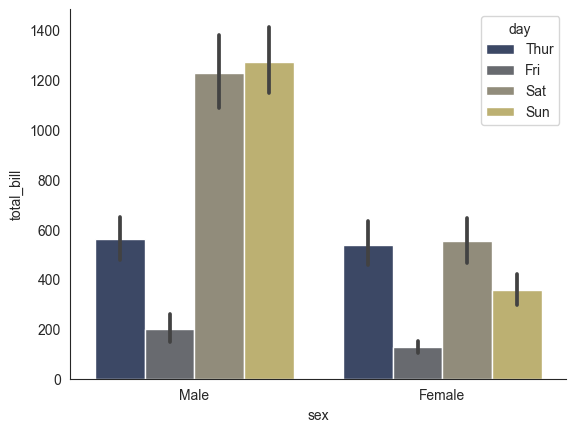

In [78]:
sns.set_style('white')
sns.barplot(x='sex', y='total_bill', data=tips, hue='day', estimator=sum, palette='cividis')
sns.despine()
# Rekomendacija: pasitikrinti galimus įvairių metodų parametrus galite kursoriui mirksint skliaustelių viduje, spaudžiant Shift+Tab. Nevenkite eksperimentuoti :)

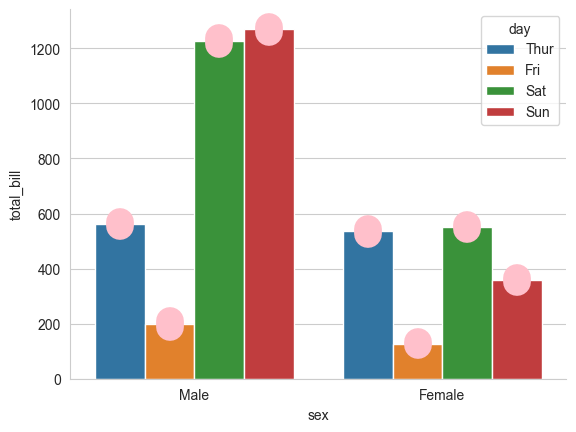

In [81]:
sns.set_style('whitegrid')
sns.barplot(
    data=tips, x='sex', y='total_bill',
    hue='day', estimator='sum', 
    # pallete='YlOrBr',
    errcolor='pink', errwidth=20, errorbar=('sd', True)
)
sns.despine()


# Seaborn užduotys

In [82]:
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns

In [83]:
%matplotlib inline

In [85]:
mpg = sns.load_dataset('mpg') # mpg - miles per gallon
mpg.head(10) # displacement - variklio tūris kubiniais coliais. Jei norite pasisunkinti, galite perkaičiuoti stulpelius europietiškais standartais :)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino
5,15.0,8,429.0,198.0,4341,10.0,70,usa,ford galaxie 500
6,14.0,8,454.0,220.0,4354,9.0,70,usa,chevrolet impala
7,14.0,8,440.0,215.0,4312,8.5,70,usa,plymouth fury iii
8,14.0,8,455.0,225.0,4425,10.0,70,usa,pontiac catalina
9,15.0,8,390.0,190.0,3850,8.5,70,usa,amc ambassador dpl


*  1 Atspausdinkite histogramą, kurioje matytųsi, kiek automobilių turi kokią akseleraciją. Šioje ir kitose užduotyse žaiskite su stiliais ir spalvomis, taip, kaip jums patinka.


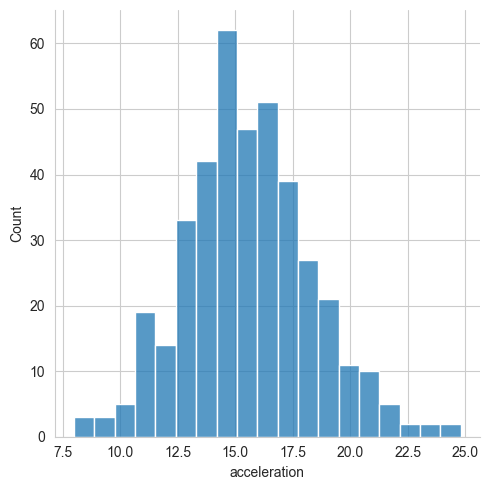

In [86]:
sns.displot(mpg['acceleration'])

* 2 Atspausdinkite histogramą, kurioje matytųsi, kiek automobilių turi kokius variklio tūrius.

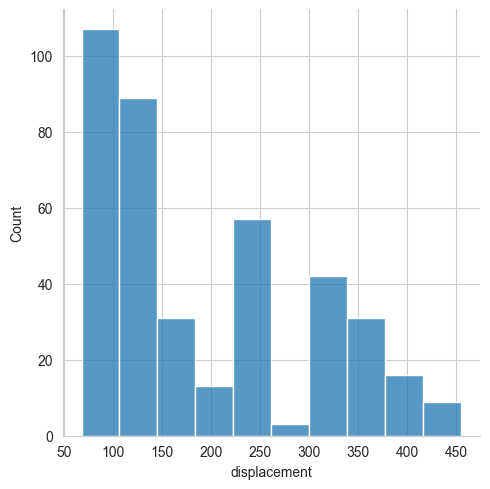

In [87]:
sns.displot(mpg['displacement'])

* 3 Atspausdinkite histogramą, kurioje matytųsi, kokie yra cilindrų skaičiaus variantai.

<AxesSubplot: xlabel='cylinders', ylabel='count'>

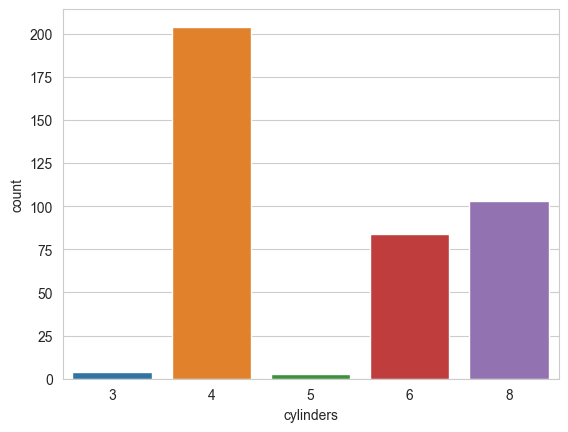

In [92]:
sns.countplot(mpg, x='cylinders')


* 4 Atspausdinkite histogramą, kurioje matytųsi, kiek yra pagaminimo metų variantų

<AxesSubplot: xlabel='model_year', ylabel='count'>

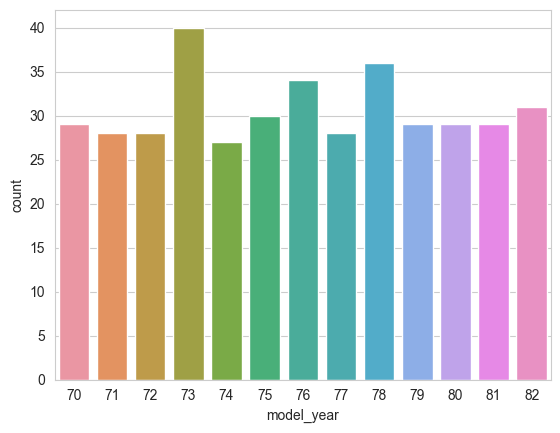

In [94]:
sns.countplot(mpg, x='model_year')

* 5 Atspausdinkite histogramą, kurioje matytųsi, kiek automobilių lentelėje kokia šalis pagamino.

<AxesSubplot: xlabel='origin', ylabel='count'>

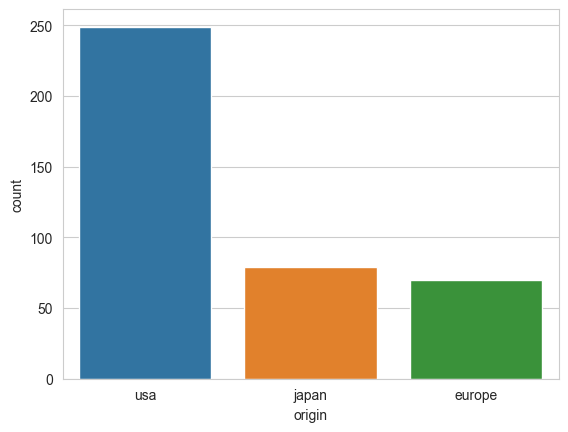

In [101]:

sns.countplot(mpg, x='origin')

* 6 Atspausdinkite histogramą, kurioje matytųsi, koks kurioje šalyje pagamintų automobilių variklio tūrio vidurkis.

<AxesSubplot: xlabel='origin', ylabel='displacement'>

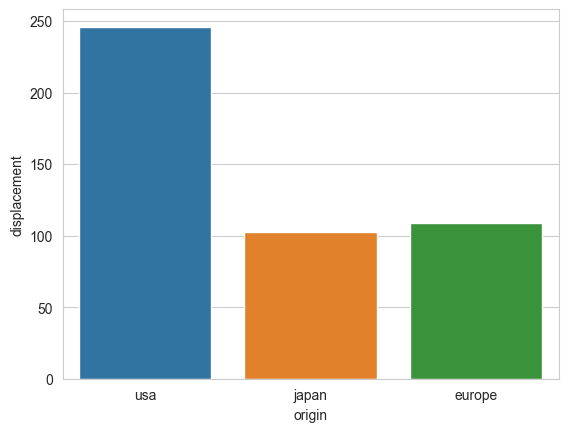

In [105]:
sns.barplot(
    mpg, 
    x='origin', 
    y='displacement', 
    errorbar=('ci', False)
)

* 6 Atspausdinkite sklaidos diagramą, kurios x ašis būtų 'displacement', y - 'acceleration', taip pat kiekvienas taškas atspindėtų šalį gamintoją ir cilindrų skaičių

<AxesSubplot: xlabel='displacement', ylabel='acceleration'>

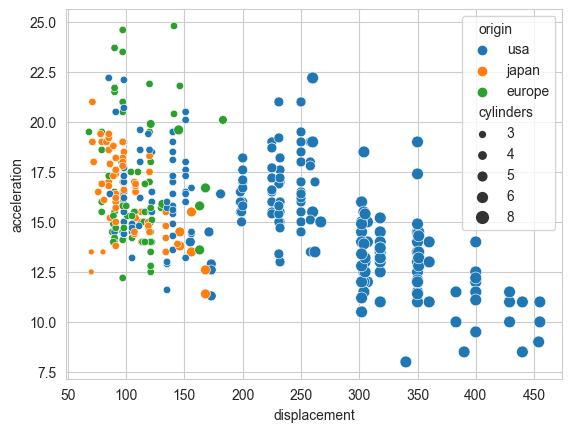

In [107]:
sns.scatterplot(
    mpg, 
    x='displacement', 
    y='acceleration', 
    hue='origin', 
    size='cylinders'
)


* 7 Atspausdinkite visas įmanomas sklaidos diagramas lentelėje, kur pagal taško spalvą matytumėm šalį gamintoją. Kokias tendencijas galima aiškiai išskirti?

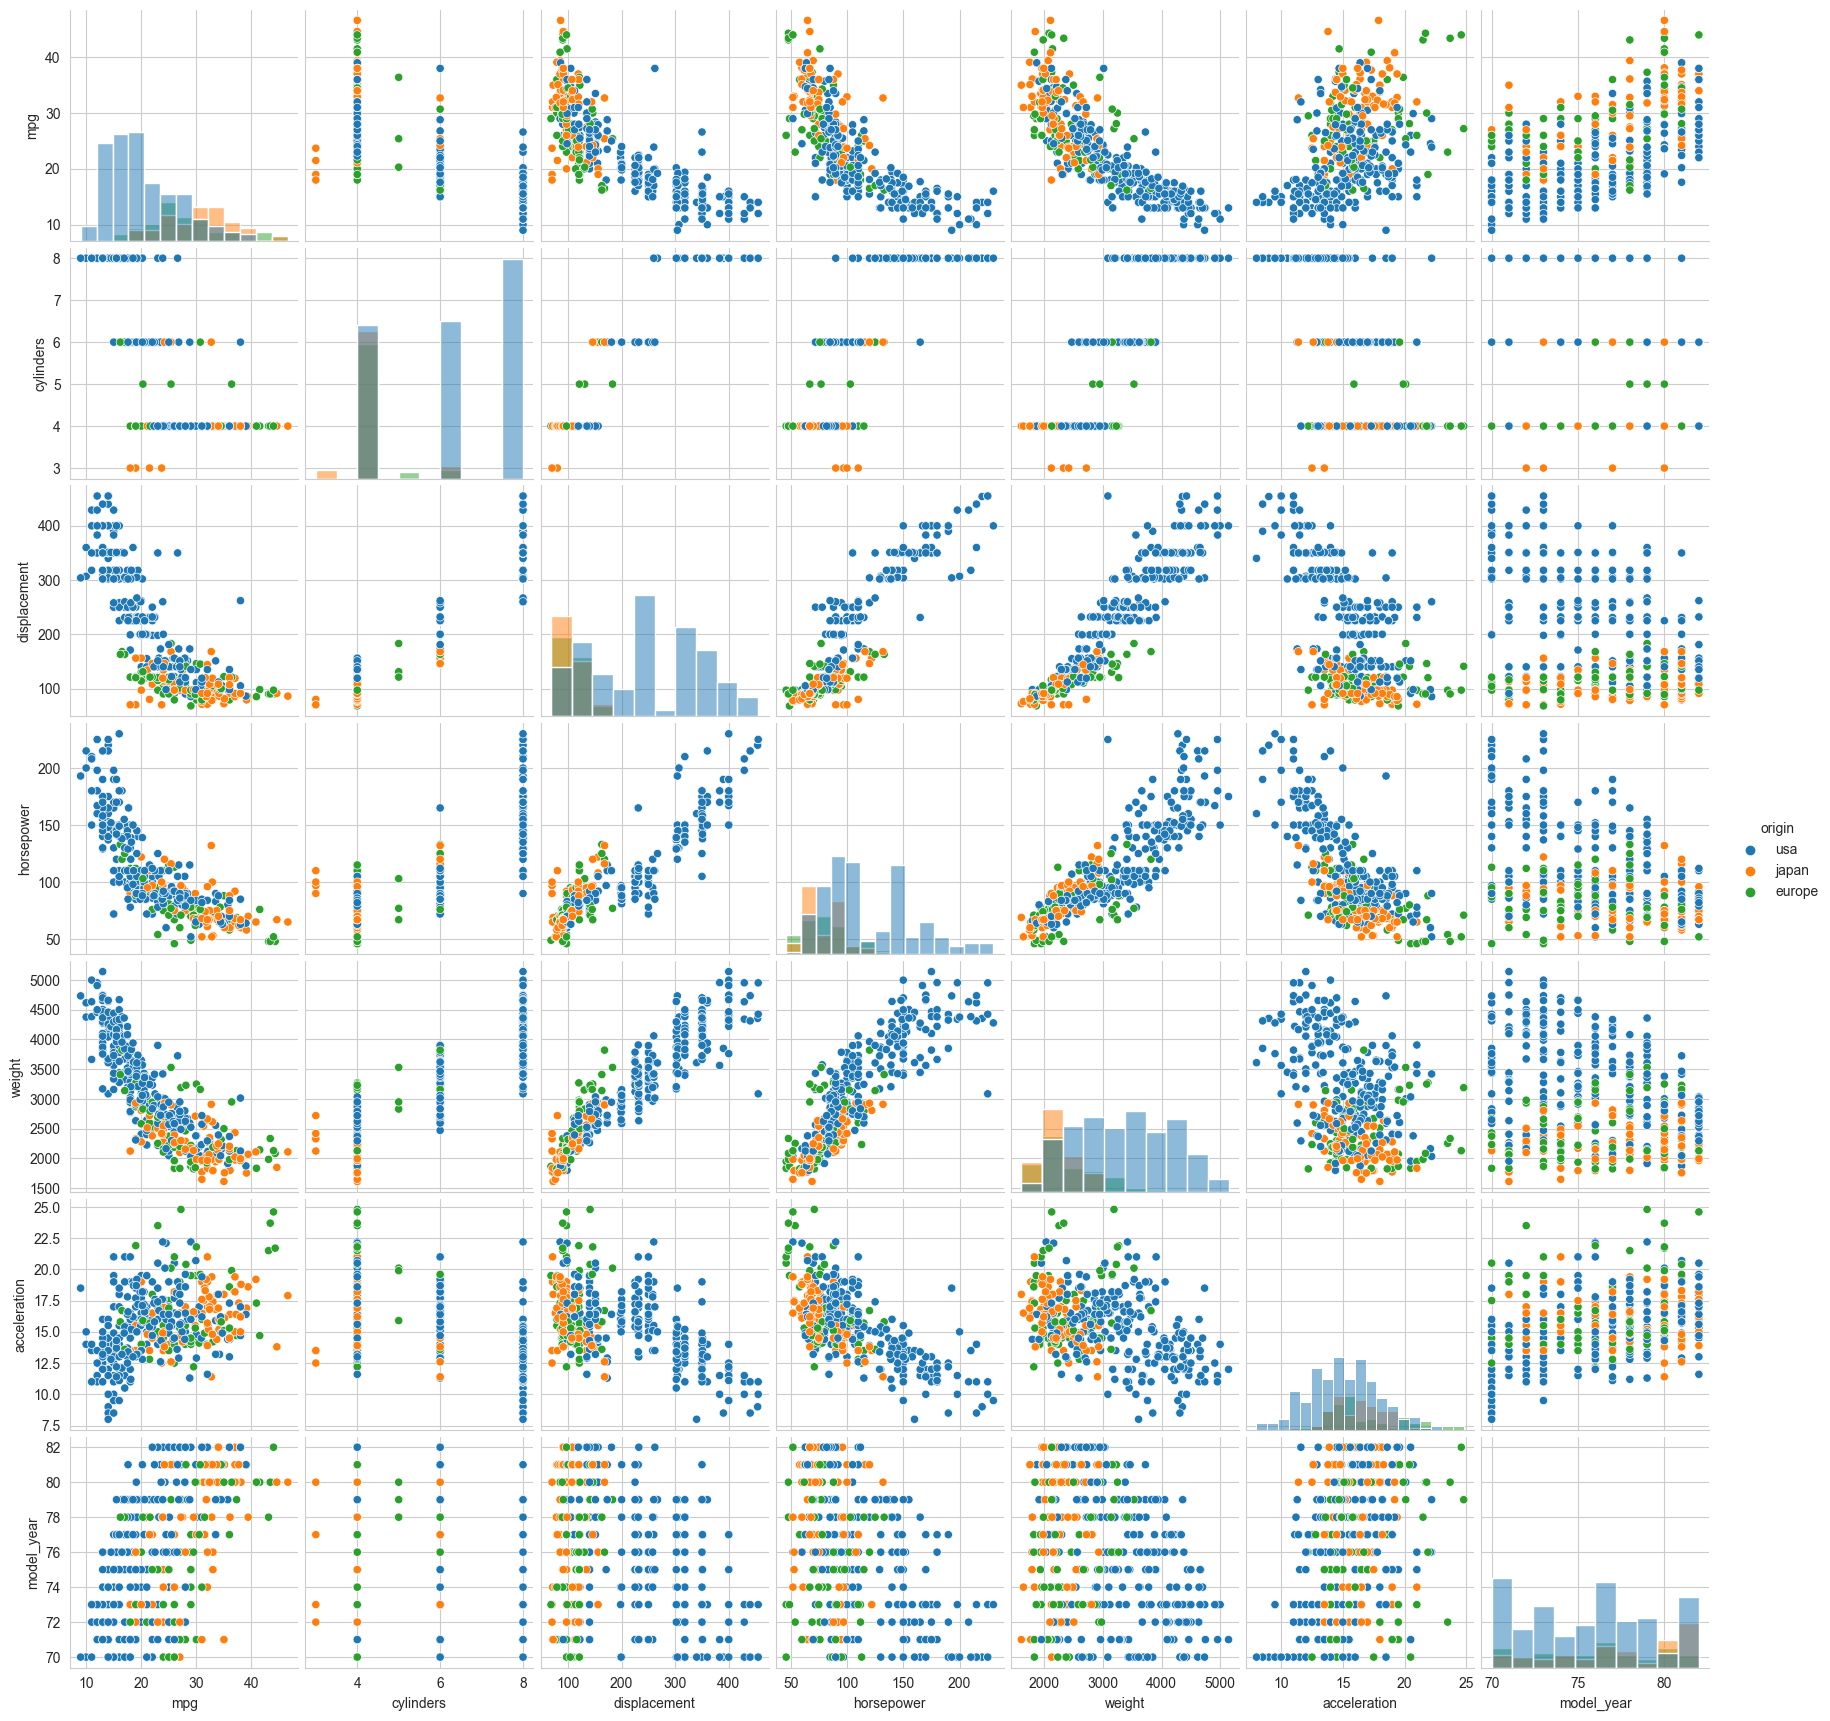

In [109]:
sns.pairplot(mpg, hue='origin', diag_kind='hist')

* 8 Atspausdinkite stulpelinę diagramą, 'origin' x 'mpg'. Pabandykite interpretuoti rezultatą.

<AxesSubplot: xlabel='origin', ylabel='mpg'>

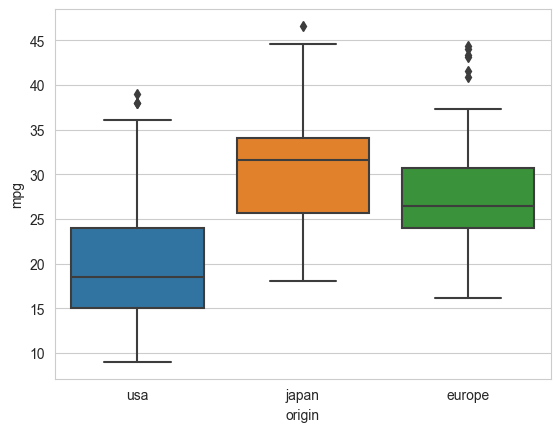

In [113]:
sns.boxplot(mpg, x='origin', y='mpg')

* 9 Sukurkite koreliacijų matricą. Jos pagrindu atspausdinkite mozaikinę diagramą.

In [116]:
mpg.corr()


C:\Users\serge\AppData\Local\Temp\ipykernel_19652\2920629125.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  mpg.corr()


,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
mpg,1.000000,-0.775396,-0.804203,-0.778427,-0.831741,0.420289,0.579267
cylinders,-0.775396,1.000000,0.950721,0.842983,0.896017,-0.505419,-0.348746
displacement,-0.804203,0.950721,1.000000,0.897257,0.932824,-0.543684,-0.370164
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361
weight,-0.831741,0.896017,0.932824,0.864538,1.000000,-0.417457,-0.306564
acceleration,0.420289,-0.505419,-0.543684,-0.689196,-0.417457,1.000000,0.288137
model_year,0.579267,-0.348746,-0.370164,-0.416361,-0.306564,0.288137,1.000000


C:\Users\serge\AppData\Local\Temp\ipykernel_19652\2002415575.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  koreliacija = mpg.corr()


<AxesSubplot: >

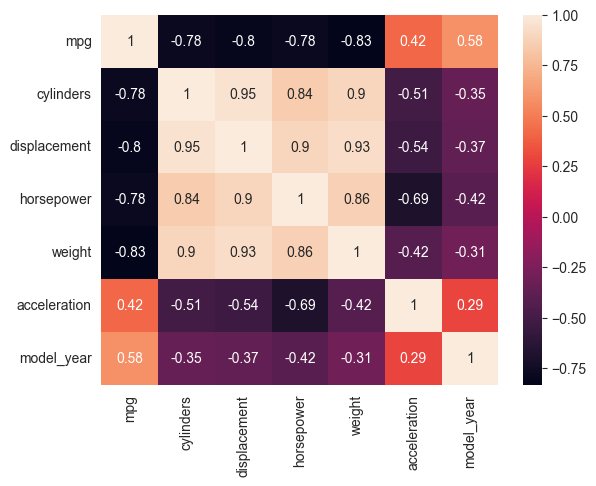

In [117]:
koreliacija = mpg.corr()
sns.heatmap(koreliacija, annot=True, )

* 10 Atspausdinkite sklaidos diagramų rinkinį, kuriame kiekviena lentelė pagal šalį rodytų 'acceleration' ir 'mpg' sąntykį.

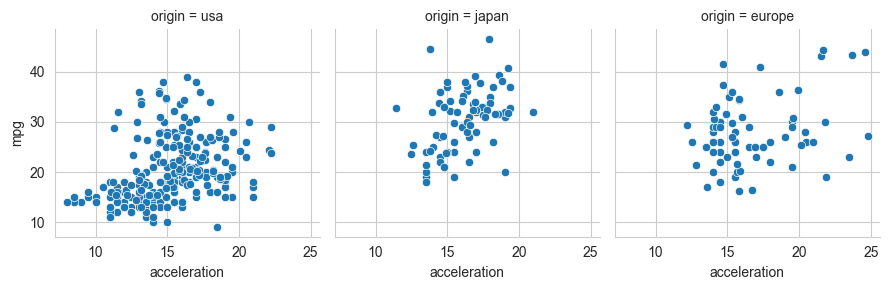

In [127]:
gridas = sns.FacetGrid(mpg, col='origin')
gridas.map(sns.scatterplot, 'acceleration', 'mpg')
gridas